In [40]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [41]:
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
prediction, data, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [131]:
# categorize data into subgroups based on characteristic feature 22
prediction_0, prediction_1, prediction_2, data_0, data_1, data_2, ids_0, ids_1, ids_2 = categorize_data_feature_PRIjetnum(prediction, data, ids)
# print_statistics(data_0, data_1, data_2)

#### Data Cleaning and Preprocessing

In [132]:
low = 1
high = 99

In [133]:
prediction_0, data_0 = preprocess_data(data_0, prediction_0, low, high, True, 0)
prediction_1, data_1 = preprocess_data(data_1, prediction_1, low, high, True, 1)
prediction_2, data_2 = preprocess_data(data_2, prediction_2, low, high, True, 2)
data_0 = build_poly(data_0, 2)
data_0 = np.delete(data_0, 0, axis=1)
data_1 = build_poly(data_1, 2)
data_1 = np.delete(data_1, 0, axis=1)
data_2 = build_poly(data_2, 2)
data_2 = np.delete(data_2, 0, axis=1)
y_0, tx_0 = build_model_data(prediction_0, data_0)
y_1, tx_1 = build_model_data(prediction_1, data_1)
y_2, tx_2 = build_model_data(prediction_2, data_2)

In [55]:
tx_0

array([[ 1.00000000,  0.66101770,  0.80244101, ...,  0.41332944,
         0.00182463,  0.72807629],
       [ 1.00000000,  1.19304821, -0.76438648, ...,  9.70414586,
         0.22161581,  2.18021769],
       [ 1.00000000, -0.16014788,  0.32737920, ...,  0.89218500,
         0.00052260,  0.00064378],
       ...,
       [ 1.00000000,  1.01277727, -3.15709972, ...,  0.08878603,
         0.58649655,  2.56907598],
       [ 1.00000000,  0.34662708,  0.82001858, ...,  0.74484835,
         2.20350539,  0.04197405],
       [ 1.00000000, -0.44197828, -0.62966662, ...,  0.65096329,
         0.20877254,  0.12163220]])

In [56]:
# data without preprocessing
x, _, _ = standardize(data)
y, tx = build_model_data(prediction, x)

### Exploratory Data Analysis

#### Plots

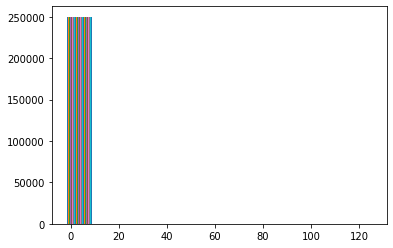

In [57]:
# complete histogram over all features
plt.hist(tx)
plt.show()

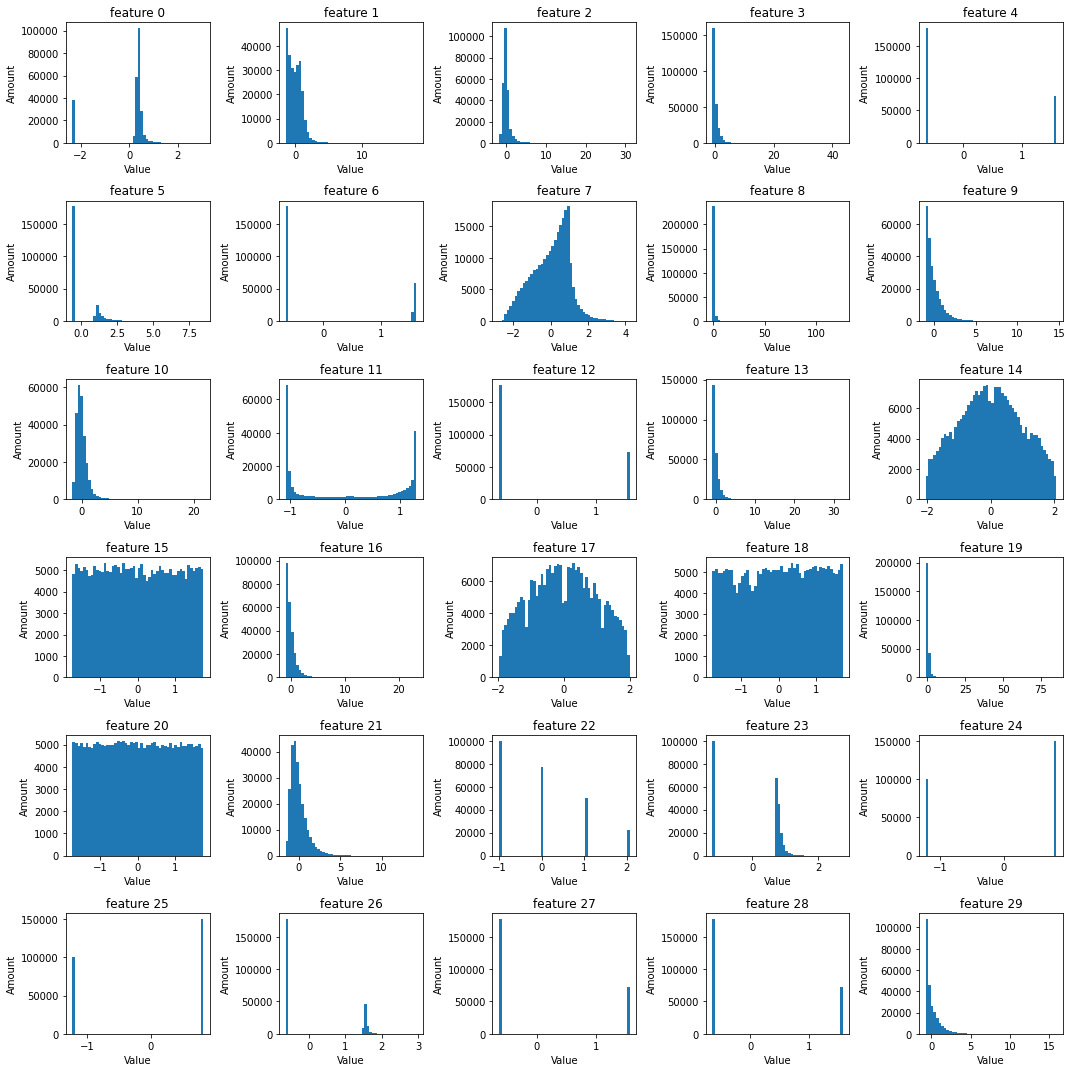

In [58]:
# plots raw data
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

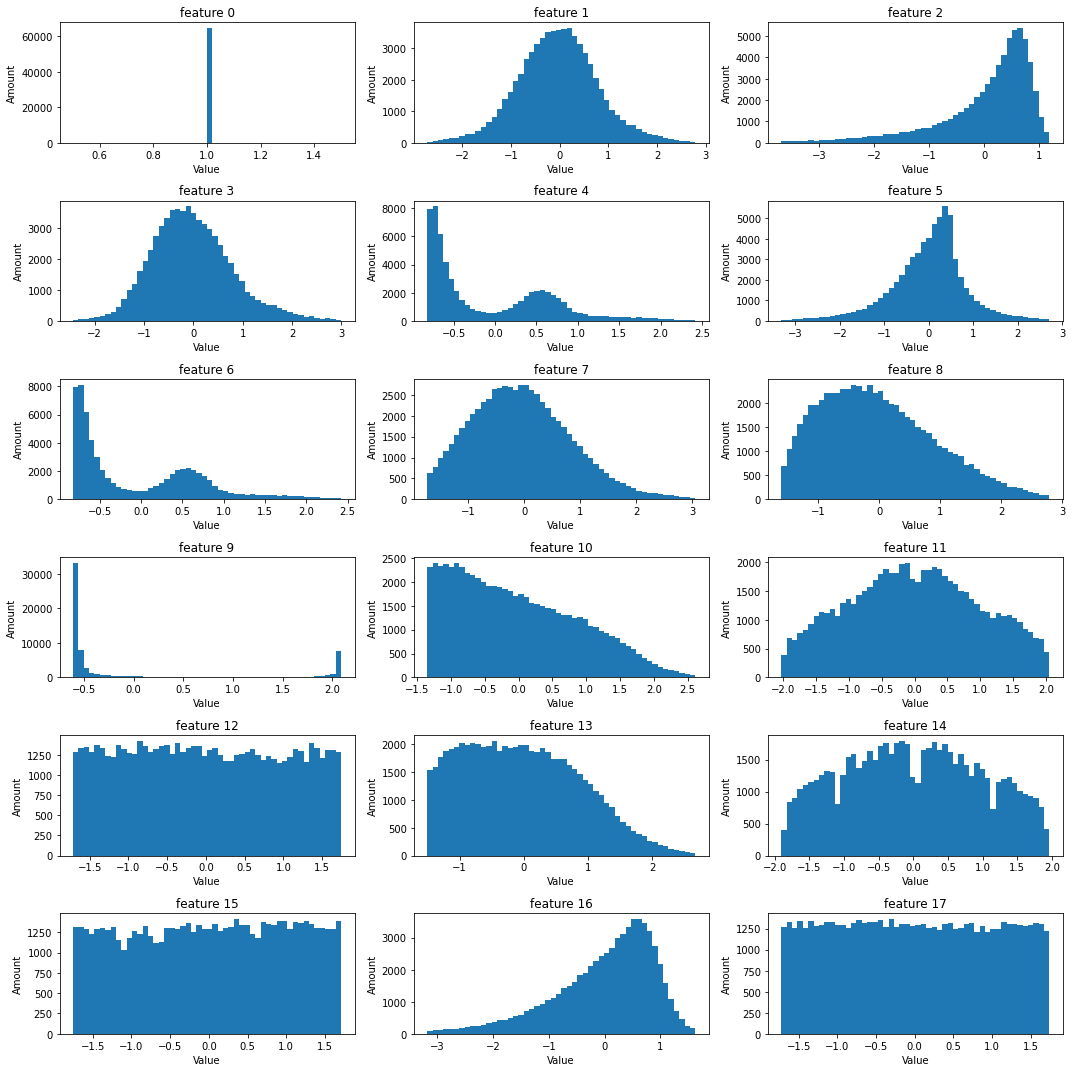

In [59]:
# plot data without outliers
fig, axes = plt.subplots(6, 3, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx_0[:, i], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

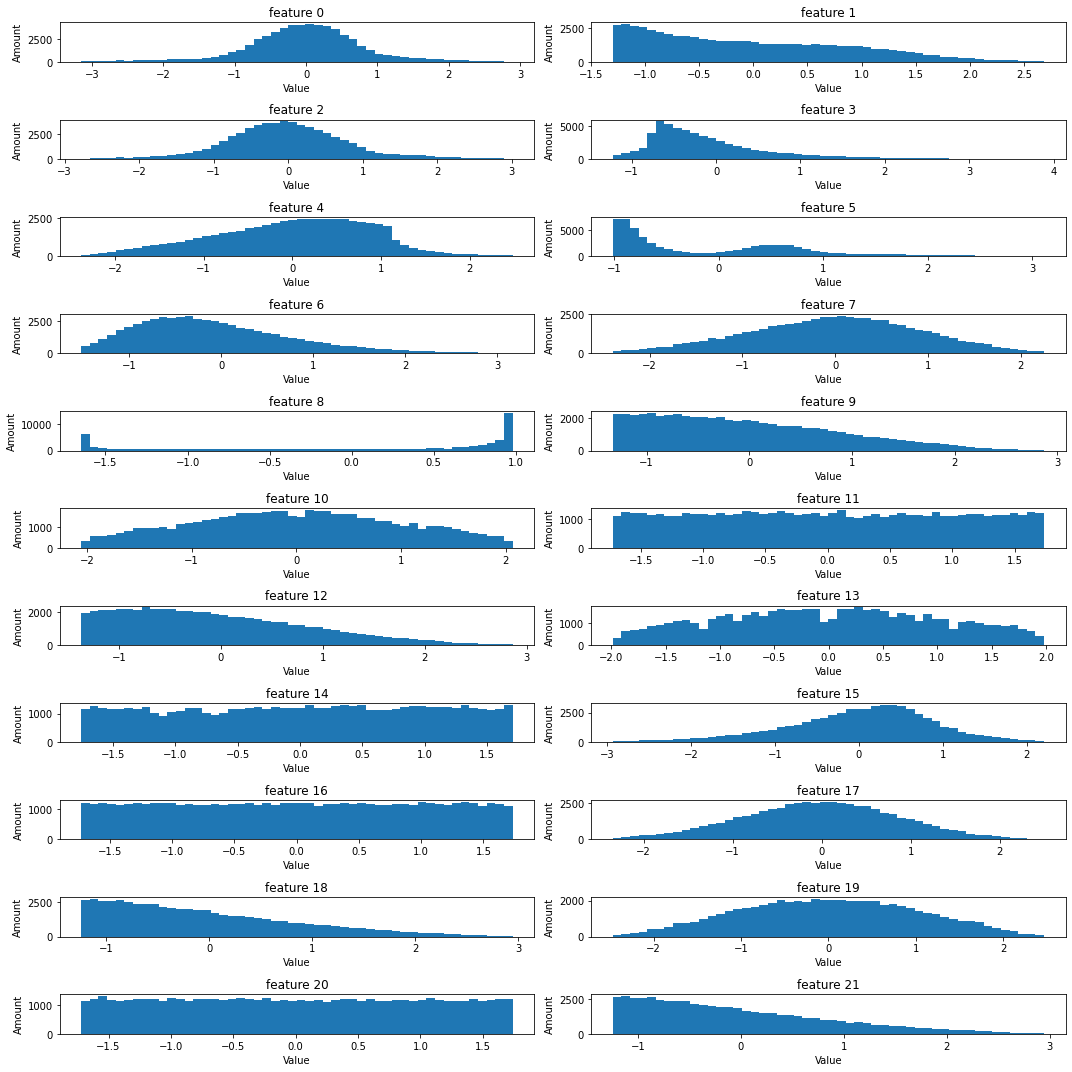

In [60]:
# plot data without outliers
fig, axes = plt.subplots(11, 2, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx_1[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

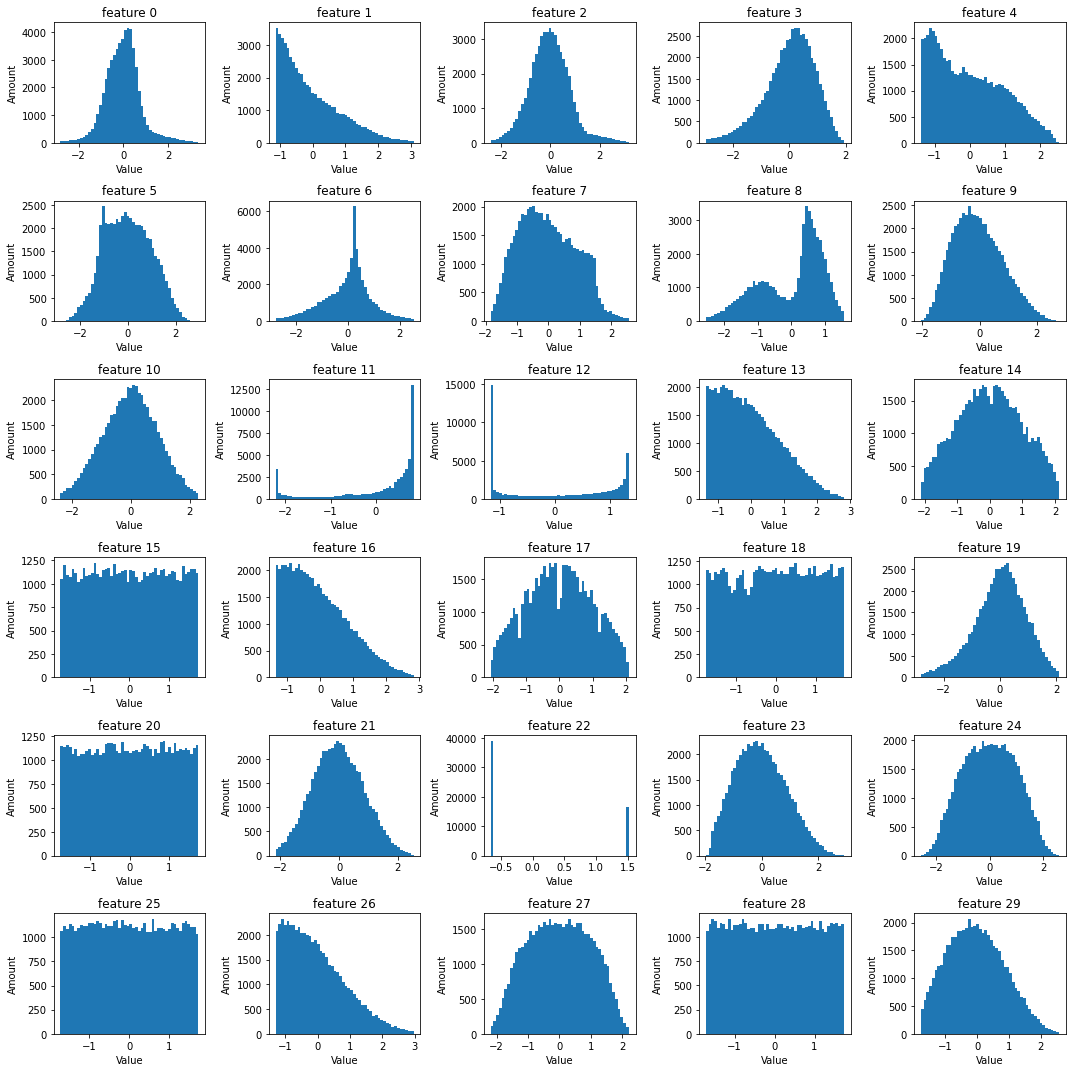

In [61]:
# plot data without outliers
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx_2[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

#### Least Squares

In [62]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y, tx)
(least_squares_w, least_squares_loss)

(array([  -0.31466400,    0.02937883,   -0.25253148,   -0.25479112,
          -0.03036968,   -1.40144773,    0.29570164,  -10.78894718,
           0.26788086,   -0.00244935, -328.81257320,   -0.18264789,
           0.11403963,   20.50459646,   63.88243701,   -0.00031896,
          -0.00180884,   62.99163391,   -0.00044864,    0.00154379,
           0.12146270,    0.00039527,   -0.06332235,   -0.20674709,
          -0.11665578,    0.09862574,    0.16790762,   -0.03351464,
          -2.98358681,   -5.36388091,  278.46624823]),
 0.6788911969786604)

In [63]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.744972

In [64]:
# Least Squares
least_squares_w_0, least_squares_loss_0 = least_squares(y_0, tx_0)
(least_squares_w_0, least_squares_loss_0)

(array([    0.14886798,    -0.00822361,    -0.22631699,    -0.41294755,
         -283.46825054,     0.38041601,   283.44388807,     0.51850911,
            0.77320175,     0.09572254,     0.80202321,     0.00065805,
            0.00010983,    -0.78869244,     0.00602608,     0.00013152,
           -0.07873184,    -0.00774947,     0.05412780,    -0.02275673,
           -0.06134188,    -0.10904073, -1961.80135445,     0.03255660,
         1961.83669143,     0.22105208,    -0.00271913,    -0.06883382,
           -0.20903222,    -0.03236342,     0.00475876,    -0.24407761,
           -0.05834373,     0.00236206,     0.00551940,     0.00216119,
           -0.00965135]),
 0.5833273001887439)

In [65]:
# calculate prediction
ypred = predict_labels(least_squares_w_0, tx_0)
ypred = np.squeeze(ypred)

(ypred == y_0).mean()

0.7955466839971529

In [97]:
# Least Squares
least_squares_w_1, least_squares_loss_1 = least_squares(y_1, tx_1)
(least_squares_w_1, least_squares_loss_1)

(array([   -0.11129157,     0.23428517,    -0.17429801,    -0.30715738,
            0.06300148,     0.22005798,     0.03360679,    -1.05297224,
           -1.02230993,     0.06401302,    -0.14065117,     0.00247190,
           -0.00593937,     1.16469891,    -0.00449187,    -0.00089263,
            0.03142496,     0.00316796,    -0.01235225, -1786.32342997,
           -0.00165568,    -0.00163344,  1787.09653151,     0.03502760,
           -0.05046771,    -0.10839753,     0.04316383,    -0.12966362,
           -0.02129783,    -0.17661116,     0.06183000,     0.02144504,
            0.01466071,    -0.04086760,     0.00228959,     0.00138459,
           -0.07252133,     0.00155102,    -0.00018385,    -0.00075718,
           -0.02876222,  -807.16719197,     0.14444733,    -0.00264068,
          807.31593143]),
 0.6868212230512957)

In [98]:
# calculate prediction
ypred = predict_labels(least_squares_w_1, tx_1)
ypred = np.squeeze(ypred)

(ypred == y_1).mean()

0.7582683426096666

In [68]:
# Least Squares
least_squares_w_2, least_squares_loss_2 = least_squares(y_2, tx_2)
(least_squares_w_2, least_squares_loss_2)

(array([-4.81814001,  0.31597481, -0.07486485, -0.08073066,  0.09784731,
        -9.47067601, -0.14696940, -8.11019414,  0.12582125, -0.07360845,
        -0.32152769,  8.36877800,  0.08280022,  0.13145941,  6.41005476,
         0.00107574,  0.00075068, -5.28056995, -0.00937547,  0.00539783,
         0.08037173,  0.00111479, -0.08182061, -0.16685216,  0.05192921,
        -0.01470860,  0.00436501,  0.11196311, -0.05386093, -0.00137410,
         0.22763481, -0.13098829, -0.04972050, -0.07901090,  0.05007960,
        -3.36267183,  0.02456741, -0.03587834, -0.12671801, -0.01192747,
        -0.05906969, -0.00242005,  0.02425956,  0.04490447,  0.02188236,
        -0.04168807,  0.00011907,  0.00655656, -0.04405429,  0.00341421,
         0.03042945, -0.00410229, -0.00294358,  0.13276326, -0.00565140,
         3.50285308,  0.00167920, -0.00900498,  4.78196675, -0.00240817,
         0.03181910]),
 0.6218113830281093)

In [69]:
# calculate prediction
ypred = predict_labels(least_squares_w_2, tx_2)
ypred = np.squeeze(ypred)

(ypred == y_2).mean()

0.7926682584420947

#### Gradient Descent

Finding hyperparameters for full set (not-preprocessed), group0, group1, group2

In [70]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    gradient_w, gradient_loss = least_squares_GD(y, tx, initial_w, max_iters, gamm)
#best one 0.1

gamma = 0.1

gradient_w, gradient_loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=10.282 seconds
Gradient Descend: final loss = 0.6992032996264197


In [71]:
# calculate prediction
ypred = predict_labels(gradient_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.736132

In [72]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx_0.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    gradient_w_0, gradient_loss_0 = least_squares_GD(y_0, tx_0, initial_w, max_iters, gamm) 

#best one is 0.01

gamma = 0.01

gradient_w_0, gradient_loss_0 = least_squares_GD(y_0, tx_0, initial_w, max_iters, gamma)

Gradient Descent: execution time=2.777 seconds
Gradient Descend: final loss = 0.6378482265638742


In [73]:
# calculate prediction
ypred = predict_labels(gradient_w_0, tx_0)
ypred = np.squeeze(ypred)

(ypred == y_0).mean()

0.7809859808745706

In [99]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx_1.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    gradient_w_1, gradient_loss_1 = least_squares_GD(y_1, tx_1, initial_w, max_iters, gamm)
#best one is 0.01

gamma = 0.01

gradient_w_1, gradient_loss_1 = least_squares_GD(y_1, tx_1, initial_w, max_iters, gamma)

Gradient Descent: execution time=3.555 seconds
Gradient Descend: final loss = 0.7337936978990864


In [100]:
# calculate prediction
ypred = predict_labels(gradient_w_1, tx_1)
ypred = np.squeeze(ypred)

(ypred == y_1).mean()

0.7437025257566273

In [79]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx_2.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
    #gradient_w_2, gradient_loss_2 = least_squares_GD(y_2, tx_2, initial_w, max_iters, gamm)
#best one is 0.01

gamma = 0.01

gradient_w_2, gradient_loss_2 = least_squares_GD(y_2, tx_2, initial_w, max_iters, gamma)

Gradient Descent: execution time=7.301 seconds
Gradient Descend: final loss = 0.6800002945055877


In [80]:
# calculate prediction
ypred = predict_labels(gradient_w_2, tx_2)
ypred = np.squeeze(ypred)

(ypred == y_2).mean()

0.765344774967237

#### Stochastic Gradient Descent

In [81]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    sgd_w, sgd_loss = least_squares_SGD(y, tx, initial_w, max_iters, gamm)
#best one is 0.01

gamma = 0.01

sgd_w, sgd_loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)

SGD: execution time=13.522 seconds
Stochastic Gradient Descend: final loss = 0.8666864672032415


In [82]:
# calculate prediction
ypred = predict_labels(sgd_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.656604

In [83]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx_0.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    sgd_w_0, sgd_loss_0 = least_squares_SGD(y_0, tx_0, initial_w, max_iters, gamm)
#best one is 0.001

gamma = 0.001

sgd_w_0, sgd_loss_0 = least_squares_SGD(y_0, tx_0, initial_w, max_iters, gamma)

SGD: execution time=10.036 seconds
Stochastic Gradient Descend: final loss = 0.8641440723906244


In [84]:
# calculate prediction
ypred = predict_labels(sgd_w_0, tx_0)
ypred = np.squeeze(ypred)

(ypred == y_0).mean()

0.7305109398694024

In [101]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx_1.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    sgd_w_1, sgd_loss_1 = least_squares_SGD(y_1, tx_1, initial_w, max_iters, gamm)
#best one is 0.001

gamma = 0.001

sgd_w_1, sgd_loss_1 = least_squares_SGD(y_1, tx_1, initial_w, max_iters, gamma)

SGD: execution time=9.956 seconds
Stochastic Gradient Descend: final loss = 0.8863878048549183


In [102]:
# calculate prediction
ypred = predict_labels(sgd_w_1, tx_1)
ypred = np.squeeze(ypred)

(ypred == y_1).mean()

0.6402023312073895

In [103]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50

# Initialization
initial_w = np.zeros(tx_2.shape[1])

#finding hyperparameter
#gammas = np.logspace(-5, 0, 6)
#for gamm in gammas: 
#    sgd_w_2, sgd_loss_2 = least_squares_SGD(y_2, tx_2, initial_w, max_iters, gamm)
#best one is 0.001

gamma = 0.001

sgd_w_2, sgd_loss_2 = least_squares_SGD(y_2, tx_2, initial_w, max_iters, gamma)

SGD: execution time=9.884 seconds
Stochastic Gradient Descend: final loss = 0.8923290334083708


In [104]:
# calculate prediction
ypred = predict_labels(sgd_w_2, tx_2)
ypred = np.squeeze(ypred)

(ypred == y_2).mean()

0.6630343069493564

#### Ridge Regression

In [105]:
lambdas = np.logspace(-5, 0, 15)

#seed = 56
#degree = 7
#split_ratio = 0.5
#lambda_ = find_ridge_hyperparameters(y, tx, degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
lambda_ = 10**(-5)

ridge_w, ridge_loss = ridge_regression(y, tx, lambda_)

In [106]:
# calculate prediction
ypred = predict_labels(ridge_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.744564

In [107]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.5

#lambda_ = find_ridge_hyperparameters(y_0, tx_0[:, 1:], degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
lambda_ = 10**(-5)

ridge_w_0, ridge_loss_0 = ridge_regression(y_0, tx_0, lambda_)

In [108]:
# calculate prediction
ypred = predict_labels(ridge_w_0, tx_0)
ypred = np.squeeze(ypred)

(ypred == y_0).mean()

0.7956240522390369

In [127]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.8

#lambda_ = find_ridge_hyperparameters(y_1, tx_1[:, 1:], degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
lambda_ = 10**(-5) # best one according to above find_ridge_hyperparameters

ridge_w_1, ridge_loss_1 = ridge_regression(y_1, tx_1, lambda_)

In [128]:
# calculate prediction
ypred = predict_labels(ridge_w_1, tx_1)
ypred = np.squeeze(ypred)

(ypred == y_1).mean()
#0.79 using degree 7 in the initial declaration of tx_1

0.7920860753497657

In [129]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.5

#lambda_ = find_ridge_hyperparameters(y_2, tx_2[:, 1:], degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
lambda_ = 10**(-5) # best one according to above find_ridge_hyperparameters

ridge_w_2, ridge_loss_2 = ridge_regression(y_2, tx_2, lambda_)

In [130]:
# calculate prediction
ypred = predict_labels(ridge_w_2, tx_2)
ypred = np.squeeze(ypred)

(ypred == y_2).mean()

0.7932068290756332

#### Logistic regression

In [137]:
max_iters = 500
initial_w = np.zeros(tx.shape[1])

#finding hyperparameter
#gammas = np.logspace(-1, 0, 5)
#print(gammas)
#losses_gammas = []
#for gamm in gammas: 
#    logistic_w, logistic_loss = logistic_regression(y, tx, initial_w, max_iters, gamm)
#    losses_gammas.append(logistic_loss)
#print(losses_gammas)
gamma = 0.5
 
logistic_w, logistic_loss = logistic_regression(y, tx, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599467
Current iteration=20, loss=0.530909993798499
Current iteration=40, loss=0.5193311210484918
Current iteration=60, loss=0.5135212230190999
Current iteration=80, loss=0.5096668794292991
Current iteration=100, loss=0.5069304160453026
Current iteration=120, loss=0.504913538555976
Current iteration=140, loss=0.5033930757405592
Current iteration=160, loss=0.5022269436469265
Current iteration=180, loss=0.5013199845244264
Current iteration=200, loss=0.5006063648378244
Current iteration=220, loss=0.5000393567561098
Current iteration=240, loss=0.4995850774741202
Current iteration=260, loss=0.49921850659733685
Current iteration=280, loss=0.4989208754929126
Current iteration=300, loss=0.498677911736439
Current iteration=320, loss=0.49847863191415975
Current iteration=340, loss=0.4983144949104999
Current iteration=360, loss=0.4981787974591666
Current iteration=380, loss=0.4980662357582387
Current iteration=400, loss=0.49797258296588126
Current iteration=4

In [138]:
# calculate prediction
ypred = predict_labels(logistic_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.749804

In [140]:
max_iters = 500
initial_w = np.zeros(tx_0.shape[1])

#finding hyperparameter
#gammas = np.logspace(-1, 0, 5)
#print(gammas)
#losses_gammas = []
#for gamm in gammas: 
#    logistic_w, logistic_loss = logistic_regression(y_0, tx_0, initial_w, max_iters, gamm)
#    losses_gammas.append(logistic_loss)
#print(losses_gammas)
gamma = 0.3
 
logistic_w_0, logistic_loss_0 = logistic_regression(y_0, tx_0, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599453
Current iteration=20, loss=0.4527212750609813
Current iteration=40, loss=0.44382492124967454
Current iteration=60, loss=0.4402997661685718
Current iteration=80, loss=0.4382164868331726
Current iteration=100, loss=0.43677752821904997
Current iteration=120, loss=0.4356916632728349
Current iteration=140, loss=0.43482124433328495
Current iteration=160, loss=0.4340930337539877
Current iteration=180, loss=0.4334651987267342
Current iteration=200, loss=0.432912465945764
Current iteration=220, loss=0.4324187497184469
Current iteration=240, loss=0.43197327199687774
Current iteration=260, loss=0.43156843639826026
Current iteration=280, loss=0.4311986257027013
Current iteration=300, loss=0.43085950247304194
Current iteration=320, loss=0.4305475912924781
Current iteration=340, loss=0.4302600223001716
Current iteration=360, loss=0.429994369065929
Current iteration=380, loss=0.42974854277681107
Current iteration=400, loss=0.4295207207498119
Current iterat

In [142]:
# calculate prediction
ypred = predict_labels(logistic_w_0, tx_0)
ypred = np.squeeze(ypred)

(ypred == y_0).mean()

0.8028038250858788

In [143]:
max_iters = 500
initial_w = np.zeros(tx_1.shape[1])

#finding hyperparameter
#gammas = np.logspace(-1, 0, 5)
#print(gammas)
#losses_gammas = []
#for gamm in gammas: 
#    logistic_w, logistic_loss = logistic_regression(y_1, tx_1, initial_w, max_iters, gamm)
#    losses_gammas.append(logistic_loss)
#print(losses_gammas)
gamma = 0.3
 
logistic_w_1, logistic_loss_1 = logistic_regression(y_1, tx_1, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599448
Current iteration=20, loss=0.49490696011062696
Current iteration=40, loss=0.47938616609503276
Current iteration=60, loss=0.4736624217750818
Current iteration=80, loss=0.4708264869168517
Current iteration=100, loss=0.46918629428348924
Current iteration=120, loss=0.4681320618442732
Current iteration=140, loss=0.4673982466557291
Current iteration=160, loss=0.46685432296504464
Current iteration=180, loss=0.4664302103163495
Current iteration=200, loss=0.46608564208822073
Current iteration=220, loss=0.46579621039036284
Current iteration=240, loss=0.4655464646443234
Current iteration=260, loss=0.4653262627061862
Current iteration=280, loss=0.4651287335859888
Current iteration=300, loss=0.4649490884319439
Current iteration=320, loss=0.46478390107629547
Current iteration=340, loss=0.4646306595423683
Current iteration=360, loss=0.46448747933038637
Current iteration=380, loss=0.46435291604021195
Current iteration=400, loss=0.4642258404348256
Current it

In [144]:
# calculate prediction
ypred = predict_labels(logistic_w_1, tx_1)
ypred = np.squeeze(ypred)

(ypred == y_1).mean()

0.7835597435333526

In [145]:
max_iters = 500
initial_w = np.zeros(tx_2.shape[1])

#finding hyperparameter
#gammas = np.logspace(-1, 0, 5)
#print(gammas)
#losses_gammas = []
#for gamm in gammas: 
#    logistic_w, logistic_loss = logistic_regression(y_2, tx_2, initial_w, max_iters, gamm)
#    losses_gammas.append(logistic_loss)
#print(losses_gammas)
gamma = 0.3
 
logistic_w_2, logistic_loss_2 = logistic_regression(y_2, tx_2, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599448
Current iteration=20, loss=0.4633483713331941
Current iteration=40, loss=0.44020656509321365
Current iteration=60, loss=0.43017480706907313
Current iteration=80, loss=0.42474160846670656
Current iteration=100, loss=0.4214309326809456
Current iteration=120, loss=0.4192571353332642
Current iteration=140, loss=0.4177534787368263
Current iteration=160, loss=0.41667225574958516
Current iteration=180, loss=0.4158708665227322
Current iteration=200, loss=0.41526204465795047
Current iteration=220, loss=0.4147897816544513
Current iteration=240, loss=0.41441673757695185
Current iteration=260, loss=0.41411723677156426
Current iteration=280, loss=0.41387316807522956
Current iteration=300, loss=0.4136714812753035
Current iteration=320, loss=0.4135026024917768
Current iteration=340, loss=0.4133593999292139
Current iteration=360, loss=0.41323649072850865
Current iteration=380, loss=0.41312976561165726
Current iteration=400, loss=0.41303605626751727
Current 

In [146]:
# calculate prediction
ypred = predict_labels(logistic_w_2, tx_2)
ypred = np.squeeze(ypred)

(ypred == y_2).mean()

0.8159704145198643

#### Regularized logistic regression

In [147]:
# init parameters 
max_iters = 500
gamma = 0.5
initial_w = np.zeros(tx.shape[1])
lambda_ = 10**(-5)

'''
#finding hyperparameter
gammas = np.logspace(-1, 0, 5)
print(gammas)
losses_gammas = []
for gamm in gammas: 
    reg_logistic_w, reg_logistic_loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamm)
    losses_gammas.append(reg_logistic_loss)
print(losses_gammas)

# find optimal lambda:
lambdas = np.logspace(-5, 0, 6)
seed = 56
split_ratio = 0.8
lambda_ = find_reg_log_lambda(y, tx, split_ratio, seed, lambdas, initial_w, max_iters, gamma)
'''

reg_logistic_w, reg_logistic_loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599467
Current iteration=20, loss=0.5309168378025959
Current iteration=40, loss=0.5193398488419239
Current iteration=60, loss=0.5135315142611213
Current iteration=80, loss=0.5096786009056535
Current iteration=100, loss=0.50694339932364
Current iteration=120, loss=0.5049275907269684
Current iteration=140, loss=0.5034080094412663
Current iteration=160, loss=0.5022425919102042
Current iteration=180, loss=0.5013362032594403
Current iteration=200, loss=0.5006230314502801
Current iteration=220, loss=0.5000563676839898
Current iteration=240, loss=0.4996023456340347
Current iteration=260, loss=0.4992359590526082
Current iteration=280, loss=0.4989384514105284
Current iteration=300, loss=0.4986955606227775
Current iteration=320, loss=0.4984963120989232
Current iteration=340, loss=0.4983321722457305
Current iteration=360, loss=0.4981964442028595
Current iteration=380, loss=0.4980838296159209
Current iteration=400, loss=0.49799010626733575
Current iteration=42

In [148]:
# calculate prediction
ypred = predict_labels(reg_logistic_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.7498

In [149]:
# init parameters 
max_iters = 500
gamma = 0.3
initial_w = np.zeros(tx_0.shape[1])
lambda_ = 10**(-5)

'''
#finding hyperparameter
gammas = np.logspace(-1, 0, 5)
print(gammas)
losses_gammas = []
for gamm in gammas: 
    reg_logistic_w, reg_logistic_loss = reg_logistic_regression(y_0, tx_0, lambda_, initial_w, max_iters, gamm)
    losses_gammas.append(reg_logistic_loss)
print(losses_gammas)

# find optimal lambda:
lambdas = np.logspace(-5, 0, 6)
seed = 56
split_ratio = 0.8
lambda_ = find_reg_log_lambda(y_0, tx_0, split_ratio, seed, lambdas, initial_w, max_iters, gamma)
'''

reg_logistic_w_0, reg_logistic_loss_0 = reg_logistic_regression(y_0, tx_0, lambda_, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599453
Current iteration=20, loss=0.45272663673689834
Current iteration=40, loss=0.4438313405062201
Current iteration=60, loss=0.4403068280587111
Current iteration=80, loss=0.4382240513282521
Current iteration=100, loss=0.43678551661323173
Current iteration=120, loss=0.4357000265409095
Current iteration=140, loss=0.43482995333979013
Current iteration=160, loss=0.43410207235076154
Current iteration=180, loss=0.43347455842854526
Current iteration=200, loss=0.4329221421726256
Current iteration=220, loss=0.43242873936129
Current iteration=240, loss=0.4319835719648683
Current iteration=260, loss=0.431579042838104
Current iteration=280, loss=0.43120953365183556
Current iteration=300, loss=0.4308707057780189
Current iteration=320, loss=0.43055908267892723
Current iteration=340, loss=0.4302717935207629
Current iteration=360, loss=0.43000641108045795
Current iteration=380, loss=0.4297608459370604
Current iteration=400, loss=0.4295332749739023
Current iterat

In [150]:
# calculate prediction
ypred = predict_labels(reg_logistic_w_0, tx_0)
ypred = np.squeeze(ypred)

(ypred == y_0).mean()

0.8028038250858788

In [151]:
# init parameters 
max_iters = 500
gamma = 0.3
initial_w = np.zeros(tx_1.shape[1])
lambda_ = 10**(-5)

'''
#finding hyperparameter
gammas = np.logspace(-1, 0, 5)
print(gammas)
losses_gammas = []
for gamm in gammas: 
    reg_logistic_w, reg_logistic_loss = reg_logistic_regression(y_1, tx_1, lambda_, initial_w, max_iters, gamm)
    losses_gammas.append(reg_logistic_loss)
print(losses_gammas)

# find optimal lambda:
lambdas = np.logspace(-5, 0, 6)
seed = 56
split_ratio = 0.8
lambda_ = find_reg_log_lambda(y_1, tx_1, split_ratio, seed, lambdas, initial_w, max_iters, gamma)
'''

reg_logistic_w_1, reg_logistic_loss_1 = reg_logistic_regression(y_1, tx_1, lambda_, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599448
Current iteration=20, loss=0.49491295355109055
Current iteration=40, loss=0.4793940932342759
Current iteration=60, loss=0.47367136503654333
Current iteration=80, loss=0.4708360315600177
Current iteration=100, loss=0.46919622141533296
Current iteration=120, loss=0.46814224951801203
Current iteration=140, loss=0.4674086252554106
Current iteration=160, loss=0.4668648525046506
Current iteration=180, loss=0.4664408682103487
Current iteration=200, loss=0.46609641625071635
Current iteration=220, loss=0.4658070951640298
Current iteration=240, loss=0.4655574583030062
Current iteration=260, loss=0.4653373658778785
Current iteration=280, loss=0.4651399482407953
Current iteration=300, loss=0.46496041723077414
Current iteration=320, loss=0.4647953469560054
Current iteration=340, loss=0.46464222545785616
Current iteration=360, loss=0.4644991681009095
Current iteration=380, loss=0.4643647302641896
Current iteration=400, loss=0.4642377824487262
Current iter

In [152]:
# calculate prediction
ypred = predict_labels(reg_logistic_w_1, tx_1)
ypred = np.squeeze(ypred)

(ypred == y_1).mean()

0.7835259088832873

In [153]:
# init parameters 
max_iters = 500
gamma = 0.3
initial_w = np.zeros(tx_2.shape[1])
lambda_ = 10**(-5)

'''
#finding hyperparameter
gammas = np.logspace(-1, 0, 5)
print(gammas)
losses_gammas = []
for gamm in gammas: 
    reg_logistic_w, reg_logistic_loss = reg_logistic_regression(y_2, tx_2, lambda_, initial_w, max_iters, gamm)
    losses_gammas.append(reg_logistic_loss)
print(losses_gammas)

# find optimal lambda:
lambdas = np.logspace(-5, 0, 6)
seed = 56
split_ratio = 0.8
lambda_ = find_reg_log_lambda(y_2, tx_2, split_ratio, seed, lambdas, initial_w, max_iters, gamma)
'''

reg_logistic_w_2, reg_logistic_loss_2 = reg_logistic_regression(y_2, tx_2, lambda_, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805599448
Current iteration=20, loss=0.46335487632886446
Current iteration=40, loss=0.44021584770229866
Current iteration=60, loss=0.43018583975949515
Current iteration=80, loss=0.4247538039386465
Current iteration=100, loss=0.4214439276545291
Current iteration=120, loss=0.4192706907582364
Current iteration=140, loss=0.4177674302178588
Current iteration=160, loss=0.41668648671415526
Current iteration=180, loss=0.41588529257246826
Current iteration=200, loss=0.41527660387772264
Current iteration=220, loss=0.4148044283138078
Current iteration=240, loss=0.4144314378705725
Current iteration=260, loss=0.4141319658414405
Current iteration=280, loss=0.41388790786980345
Current iteration=300, loss=0.4136862189734915
Current iteration=320, loss=0.41351732931947943
Current iteration=340, loss=0.4133741102555937
Current iteration=360, loss=0.4132511813662562
Current iteration=380, loss=0.4131444352689853
Current iteration=400, loss=0.41305070511501635
Current it

In [154]:
# calculate prediction
ypred = predict_labels(reg_logistic_w_2, tx_2)
ypred = np.squeeze(ypred)

(ypred == y_2).mean()

0.8160063192287669

#### Cross Validation

In [155]:
k_fold = 4 
seed = 1 
 
evaluate_using_cross_validation('least_squares', y_0, tx_0, k_fold, seed) 
evaluate_using_cross_validation('gradient_descent', y_0, tx_0, k_fold, seed, max_iters = 50, initial_w = np.zeros(tx_0.shape[1]), gamma = 0.01) 
evaluate_using_cross_validation('stochastic_gradient_descent', y_0, tx_0, k_fold, seed, max_iters = 50, initial_w = np.zeros(tx_0.shape[1]), gamma = 0.001) 
evaluate_using_cross_validation('ridge_regression', y_0, tx_0, k_fold, seed, lambda_ = 10**(-5))
evaluate_using_cross_validation('logistic_regression', y_0, tx_0, k_fold, seed, max_iters = 100, initial_w = np.zeros(tx_0.shape[1]), gamma = 0.3) 
evaluate_using_cross_validation('reg_logistic_regression', y_0, tx_0, k_fold, seed, max_iters = 100, initial_w = np.zeros(tx_0.shape[1]), gamma = 0.3, lambda_ = 10**(-5))

--->   least_squares  cross-validation: avg_loss_tr= 0.5832339196108688  avg_loss_te= 0.584101805670201   <---
Gradient Descent: execution time=2.371 seconds
Gradient Descend: final loss = 0.6383099758423811
Gradient Descent: execution time=1.762 seconds
Gradient Descend: final loss = 0.6394435244405243
Gradient Descent: execution time=1.775 seconds
Gradient Descend: final loss = 0.6373539727029817
Gradient Descent: execution time=1.975 seconds
Gradient Descend: final loss = 0.6361958300478854
--->   gradient_descent  cross-validation: avg_loss_tr= 0.6378258257584432  avg_loss_te= 0.637174602236663   <---
SGD: execution time=9.783 seconds
Stochastic Gradient Descend: final loss = 0.8173743263494535
SGD: execution time=9.876 seconds
Stochastic Gradient Descend: final loss = 0.8509713500556486
SGD: execution time=9.776 seconds
Stochastic Gradient Descend: final loss = 0.8523859938285665
SGD: execution time=9.792 seconds
Stochastic Gradient Descend: final loss = 0.8463859280311045
--->   

In [156]:
k_fold = 4 
seed = 1 
 
evaluate_using_cross_validation('least_squares', y_1, tx_1, k_fold, seed) 
evaluate_using_cross_validation('gradient_descent', y_1, tx_1, k_fold, seed, max_iters = 50, initial_w = np.zeros(tx_1.shape[1]), gamma = 0.01) 
evaluate_using_cross_validation('stochastic_gradient_descent', y_1, tx_1, k_fold, seed, max_iters = 50, initial_w = np.zeros(tx_1.shape[1]), gamma = 0.001) 
evaluate_using_cross_validation('ridge_regression', y_1, tx_1, k_fold, seed, lambda_ = 10**(-5))
evaluate_using_cross_validation('logistic_regression', y_1, tx_1, k_fold, seed, max_iters = 100, initial_w = np.zeros(tx_1.shape[1]), gamma = 0.3) 
evaluate_using_cross_validation('reg_logistic_regression', y_1, tx_1, k_fold, seed, max_iters = 100, initial_w = np.zeros(tx_1.shape[1]), gamma = 0.3, lambda_ = 10**(-5)) 

--->   least_squares  cross-validation: avg_loss_tr= 0.6866433406111575  avg_loss_te= 0.6881208336020522   <---
Gradient Descent: execution time=1.974 seconds
Gradient Descend: final loss = 0.7327673921938969
Gradient Descent: execution time=1.778 seconds
Gradient Descend: final loss = 0.7352623450351613
Gradient Descent: execution time=1.982 seconds
Gradient Descend: final loss = 0.7334005986121193
Gradient Descent: execution time=1.576 seconds
Gradient Descend: final loss = 0.7334192092791622
--->   gradient_descent  cross-validation: avg_loss_tr= 0.7337123862800848  avg_loss_te= 0.7332507087189152   <---
SGD: execution time=9.784 seconds
Stochastic Gradient Descend: final loss = 0.9164651781844095
SGD: execution time=9.787 seconds
Stochastic Gradient Descend: final loss = 0.9549539620178248
SGD: execution time=9.806 seconds
Stochastic Gradient Descend: final loss = 0.8861316947319935
SGD: execution time=9.885 seconds
Stochastic Gradient Descend: final loss = 0.9048597525685711
---> 

In [157]:
k_fold = 4 
seed = 1 
 
evaluate_using_cross_validation('least_squares', y_2, tx_2, k_fold, seed) 
evaluate_using_cross_validation('gradient_descent', y_2, tx_2, k_fold, seed, max_iters = 50, initial_w = np.zeros(tx_2.shape[1]), gamma = 0.01) 
evaluate_using_cross_validation('stochastic_gradient_descent', y_2, tx_2, k_fold, seed, max_iters = 50, initial_w = np.zeros(tx_2.shape[1]), gamma = 0.001) 
evaluate_using_cross_validation('ridge_regression', y_2, tx_2, k_fold, seed, lambda_ = 10**(-5))
evaluate_using_cross_validation('logistic_regression', y_2, tx_2, k_fold, seed, max_iters = 100, initial_w = np.zeros(tx_2.shape[1]), gamma = 0.3) 
evaluate_using_cross_validation('reg_logistic_regression', y_2, tx_2, k_fold, seed, max_iters = 100, initial_w = np.zeros(tx_2.shape[1]), gamma = 0.3, lambda_ = 10**(-5)) 

--->   least_squares  cross-validation: avg_loss_tr= 0.6216011402450554  avg_loss_te= 0.6234363624055809   <---
Gradient Descent: execution time=4.366 seconds
Gradient Descend: final loss = 0.6819919859545067
Gradient Descent: execution time=4.663 seconds
Gradient Descend: final loss = 0.675744381706002
Gradient Descent: execution time=4.464 seconds
Gradient Descend: final loss = 0.6807950074095193
Gradient Descent: execution time=4.765 seconds
Gradient Descend: final loss = 0.6811364912173387
--->   gradient_descent  cross-validation: avg_loss_tr= 0.6799169665718418  avg_loss_te= 0.679377796422309   <---
SGD: execution time=9.868 seconds
Stochastic Gradient Descend: final loss = 0.8966551369870576
SGD: execution time=9.784 seconds
Stochastic Gradient Descend: final loss = 0.8900328050154721
SGD: execution time=9.801 seconds
Stochastic Gradient Descend: final loss = 0.904317641347394
SGD: execution time=9.797 seconds
Stochastic Gradient Descend: final loss = 0.8941311556896263
--->   s

## Generate predictions and save ouput in csv format for submission:

In [160]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
prediction_te, data_te, ids_te = load_csv_data(DATA_TEST_PATH)

In [172]:
prediction_0_te, prediction_1_te, prediction_2_te, data_0_te, data_1_te, data_2_te, ids_0_te, ids_1_te, ids_2_te = categorize_data_feature_PRIjetnum(prediction_te, data_te, ids_te)

In [173]:
prediction_0_te, data_0_te = preprocess_data(data_0_te, prediction_0_te, low, high, False, 0)
prediction_1_te, data_1_te = preprocess_data(data_1_te, prediction_1_te, low, high, False, 1)
prediction_2_te, data_2_te = preprocess_data(data_2_te, prediction_2_te, low, high, False, 2)
data_0_te = build_poly(data_0_te, 2)
data_0_te = np.delete(data_0_te, 0, axis=1)
data_1_te = build_poly(data_1_te, 2)
data_1_te = np.delete(data_1_te, 0, axis=1)
data_2_te = build_poly(data_2_te, 2)
data_2_te = np.delete(data_2_te, 0, axis=1)
y_0_te, tx_0_te = build_model_data(prediction_0_te, data_0_te)
y_1_te, tx_1_te = build_model_data(prediction_1_te, data_1_te)
y_2_te, tx_2_te = build_model_data(prediction_2_te, data_2_te)

(227458, 18)
(175338, 22)
(165442, 30)


In [174]:
y_pred_0 = predict_labels(reg_logistic_w_0, tx_0_te)
y_pred_1 = predict_labels(reg_logistic_w_1, tx_1_te)
y_pred_2 = predict_labels(reg_logistic_w_2, tx_2_te)

y_pred_final = build_final_predictions(y_pred_0, y_pred_1, y_pred_2, prediction_te.shape[0], ids_0_te, ids_1_te, ids_2_te)

In [175]:
OUTPUT_PATH = 'submission.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(ids_te, y_pred_final, OUTPUT_PATH)

#### Submission Results
- submission 1 (28/10) = **0.796**
    - subgroup 0 --> LS
    - subgroup 1 --> ridge
        - lambda = 0.0002682695795279727
    - subgroup 2 --> LS